2022-10-09 00:33:54.299504: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shape of one row data:
(1478, 400)
(400,)
[ 6.66234127e+005  2.79610421e+009  4.20498314e+005  2.41865377e+008
  3.04773698e+008  1.33246825e+006  3.86984603e+009  1.44713157e+005
  1.52386849e+008  8.73782565e+007  3.15695362e+003  7.43765123e+008
  7.89238406e+002  2.69118920e+007  7.42702503e+006  1.11976212e+002
  1.41202081e+008 -2.53392831e+001  4.20498438e+005  1.66558532e+005
 -6.13452378e+001  1.62521540e+007 -1.49352368e+003  1.66558594e+005
  3.26886598e+238  3.00489544e-307  9.37908771e-196 -3.73651724e-230
  3.44209773e+012 -2.60706991e-003 -4.09624439e+005  3.76807813e+005
 -4.09624312e+005  1.49925685e+000  7.69178751e-011 -2.48502969e+005
  3.33117063e+005 -6.44486124e+005  5.82961919e-001 -1.87593014e-001
 -3.27699551e+006  4.94857320e+003 -3.27699550e+006  1.01634578e-004
 -4.00119096e+001 -2.57794551e+006  5.05112576e+004 -5.15589100e+006
 -2.60707132e-003 -1.01357132e+002 -2.92747151e+006  1.44713156e+005
 -7.95209498e+006 -2.53392907e+001 -6.11259167e-005 -7.318678

/Users/antonvasilev/PyCharmProjects/emg-interface/venv/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
2022-10-09 00:34:02.699407: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
16/16 [==============================] - 4s 185ms/step - loss: 2.2147 - accuracy: 0.1161 - val_loss: 2.2121 - val_accuracy: 0.1239
Epoch 2/50
16/16 [==============================] - 2s 114ms/step - loss: 2.2094 - accuracy: 0.1112 - val_loss: 2.2033 - val_accuracy: 0.0968
Epoch 3/50
16/16 [==============================] - 2s 116ms/step - loss: 2.2119 - accuracy: 0.0928 - val_loss: 2.1971 - val_accuracy: 0.1374
Epoch 4/50
16/16 [==============================] - 2s 116ms/step - loss: 2.1983 - accuracy: 0.1074 - val_loss: 2.1981 - val_accuracy: 0.1351
Epoch 5/50
16/16 [==============================] - 2s 158ms/step - loss: 2.1996 - accuracy: 0.1267 - val_loss: 2.2180 - val_accuracy: 0.1329
Epoch 6/50
16/16 [==============================] - 3s 179ms/step - loss: 2.2014 - accuracy: 0.1132 - val_loss: 2.2003 - val_accuracy: 0.1374
Epoch 7/50
16/16 [==============================] - 2s 137ms/step - loss: 2.1987 - accuracy: 0.1228 - val_loss: 2.2024 - val_accuracy: 0.1329
Epoch 

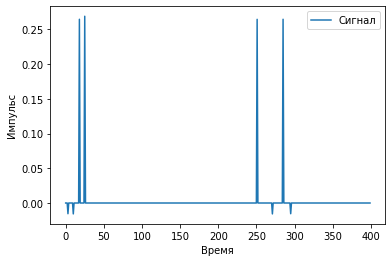

In [1]:

from src.data_manager.rflab_np_manager import RflabNpDataManager
import numpy as np
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, BatchNormalization, LSTM, Conv1D, Reshape, Dropout
from keras.datasets import imdb
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

np.random.seed(42)

np.set_printoptions(suppress=True)


rflab_manager = RflabNpDataManager()
dataset = rflab_manager.load()

X_train = dataset[2:, 0:-1]
X_train[np.isnan(X_train)] = 0.
print('Shape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])
# X_train = np.reshape(X_train, (X_train.shape[0], 400, 1))
print('ReShape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])

print('before nornalize')
print(X_train[0])
row_sums = X_train.sum(axis=1)
X_train = X_train / row_sums[:, np.newaxis]
print('after nornalize')
print(X_train[0])

Y_train = dataset[2:, -1]
print('Class labels:')
print(np.unique(Y_train))

# Convert labels to categorical one-hot encoding
one_hot_labels = to_categorical(Y_train, num_classes=9)
print(one_hot_labels.shape)
print(np.unique(one_hot_labels))

model = Sequential()
num_classes = 9
time_series = X_train.shape[1]
model.add(Reshape((400, 1), input_shape=(400,)))
model.add(SimpleRNN(64, input_shape=(None, 400, 1), return_sequences=True))
model.add(SimpleRNN(8))
# model.add(Dense(1024, input_dim=400, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, one_hot_labels, epochs=50, batch_size=65, validation_split=0.3)
y_pred = model.predict(X_train[0:1])
# print(X_train[0:1])
# print('X_pred')
# print(X_train[0:1])
print('y_pred')
print(y_pred)

plt.plot(X_train[140],
         label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Импульс')
plt.legend()
plt.savefig('emg_example.png')

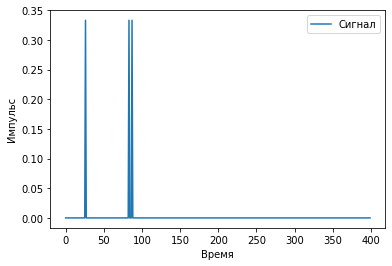

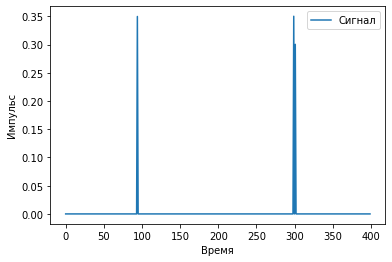

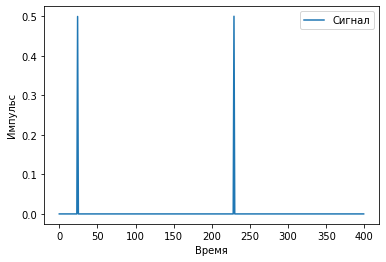

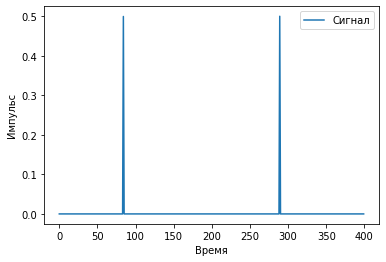

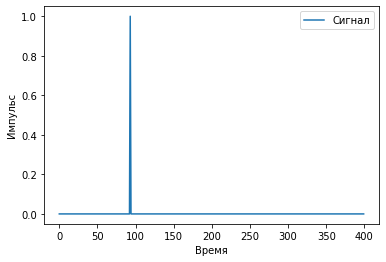

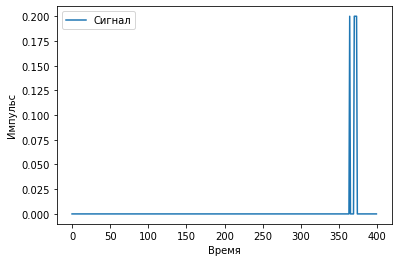

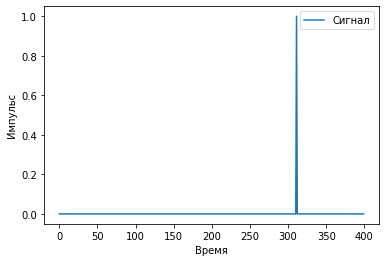

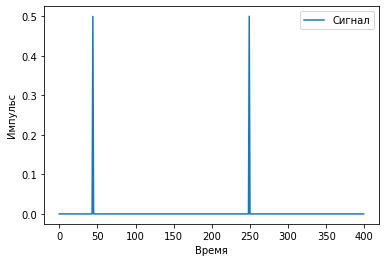

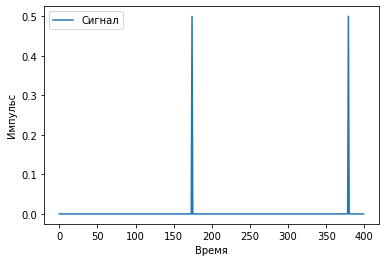

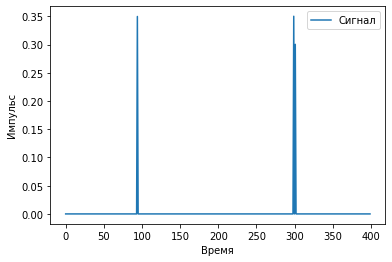

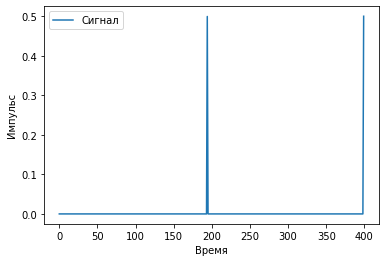

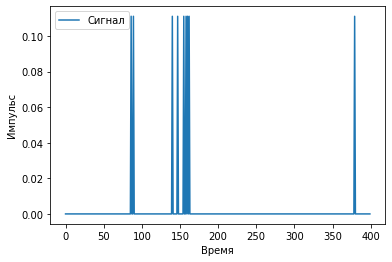

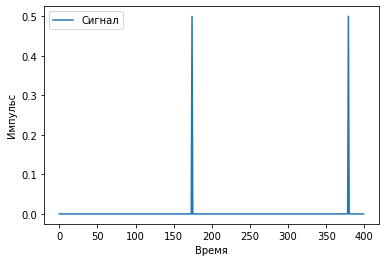

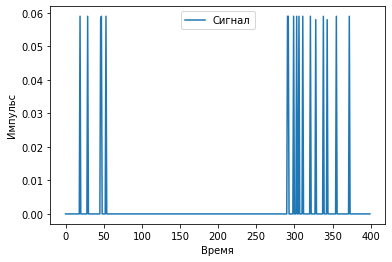

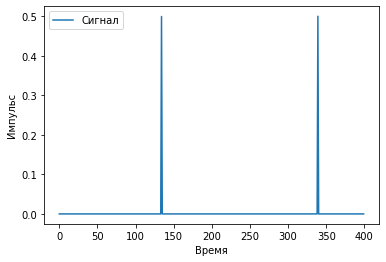

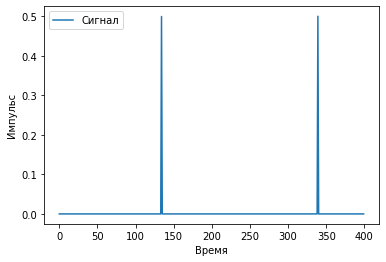

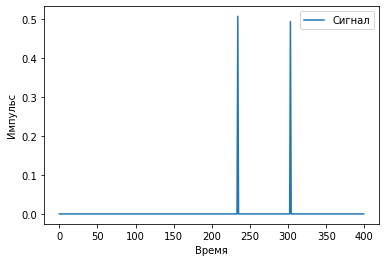

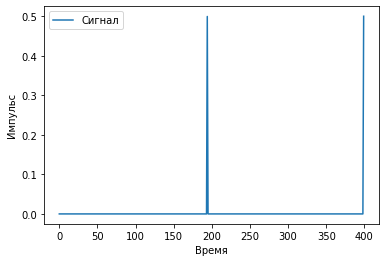

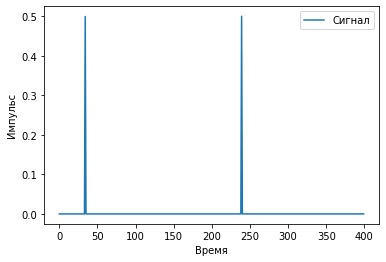

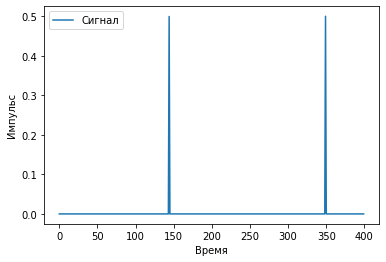

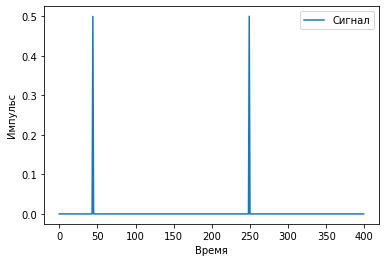

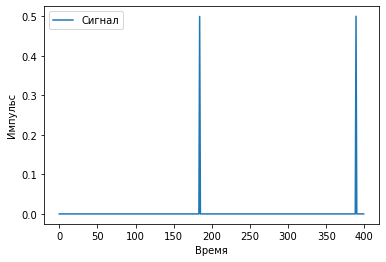

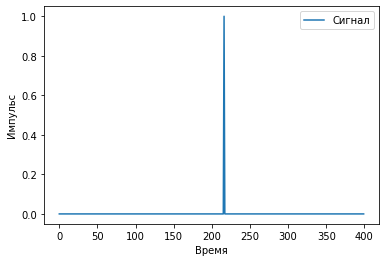

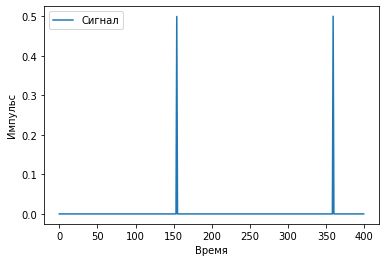

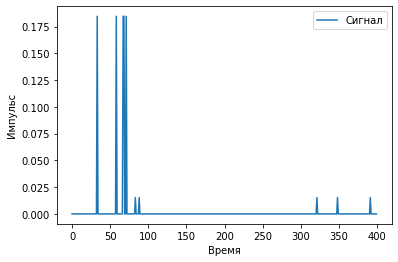

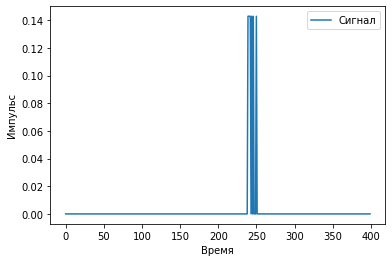

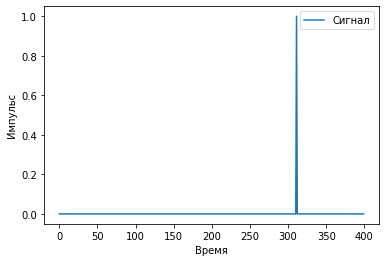

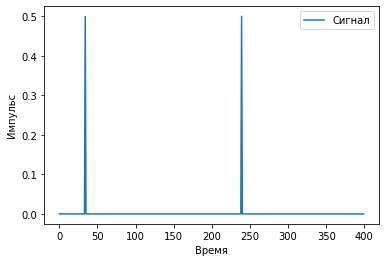

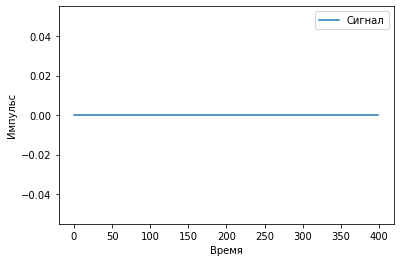

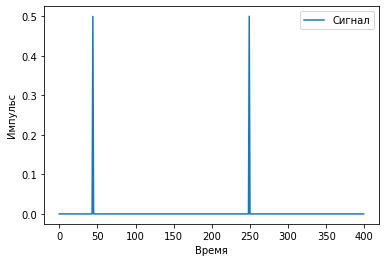

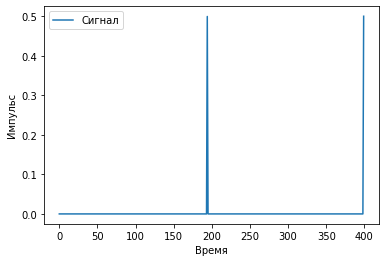

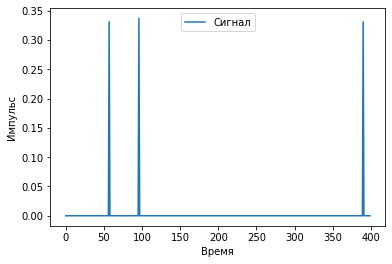

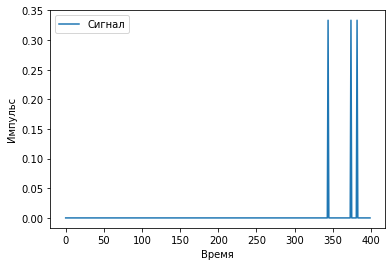

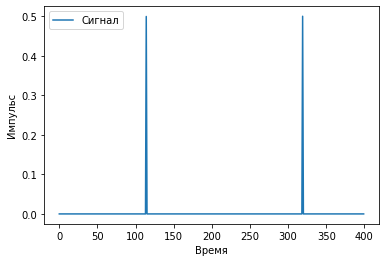

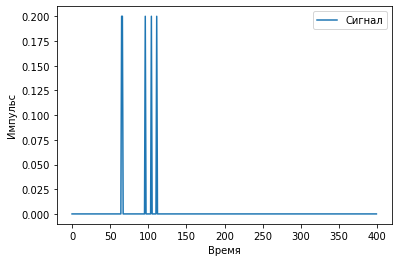

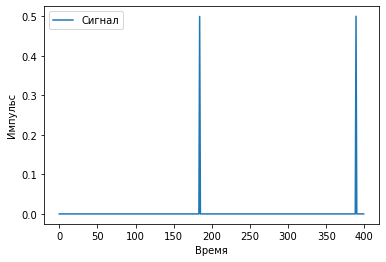

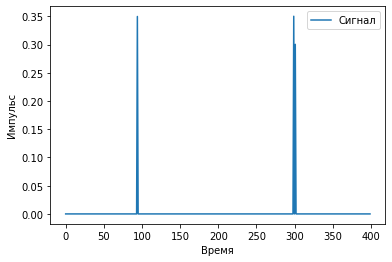

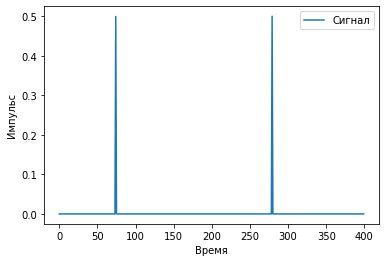

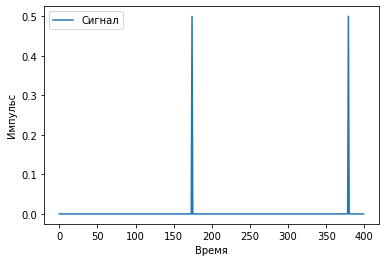

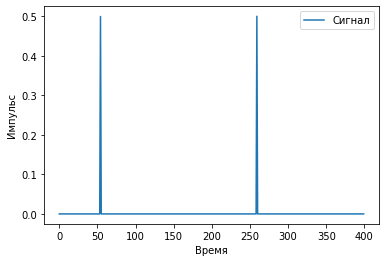

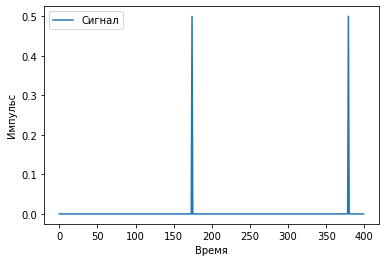

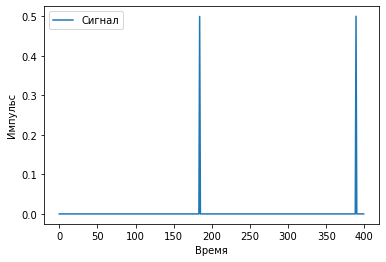

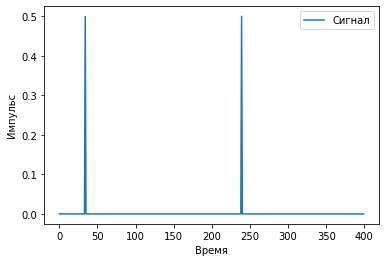

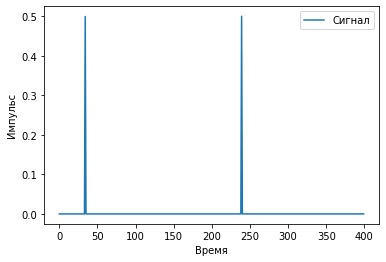

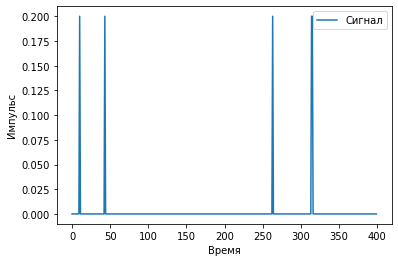

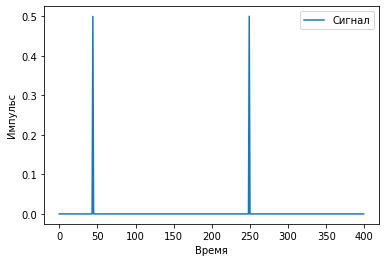

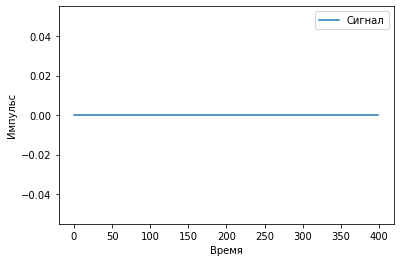

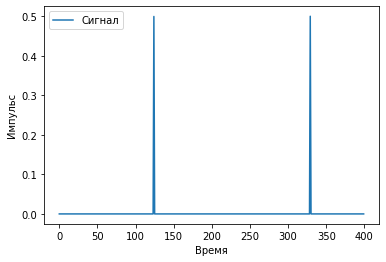

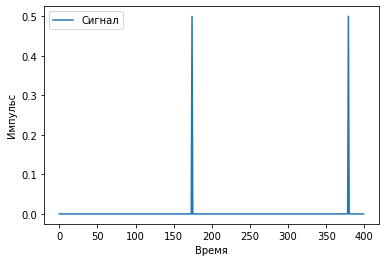

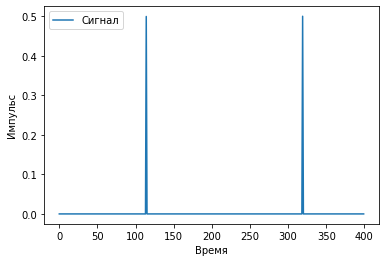

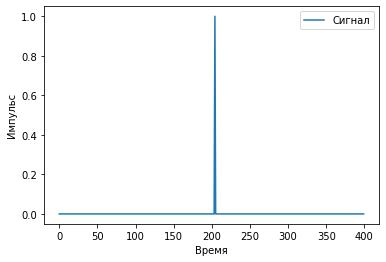

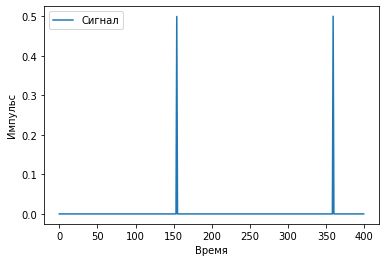

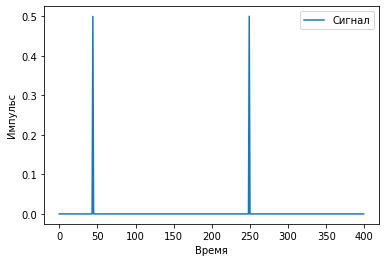

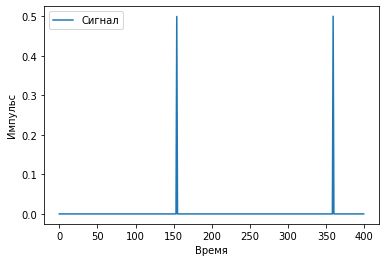

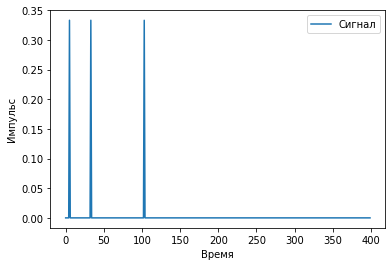

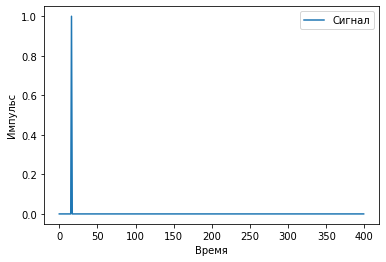

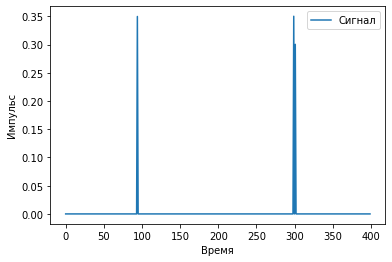

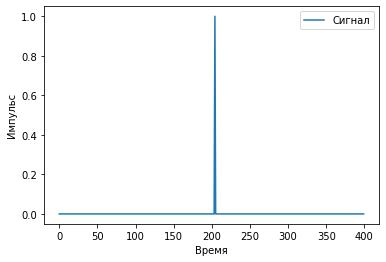

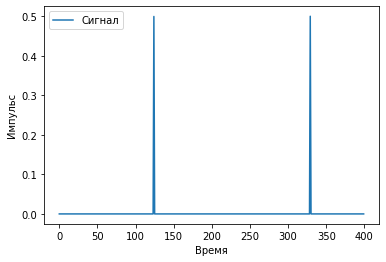

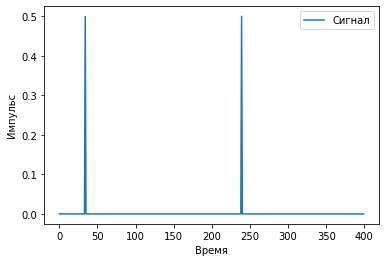

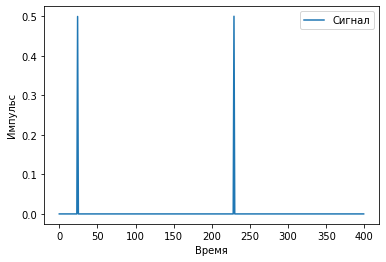

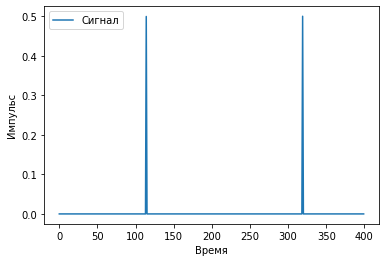

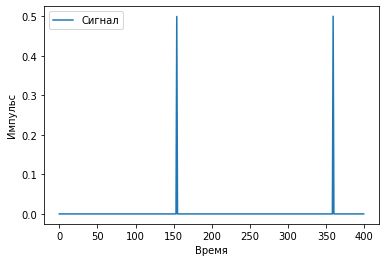

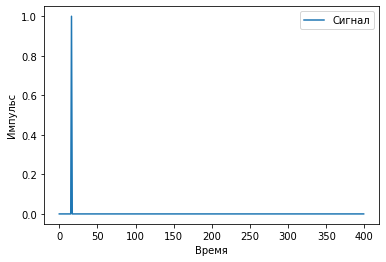

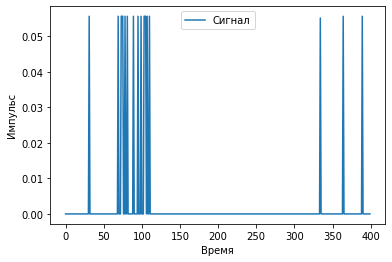

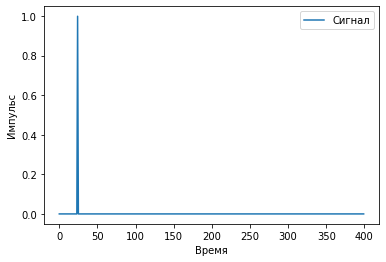

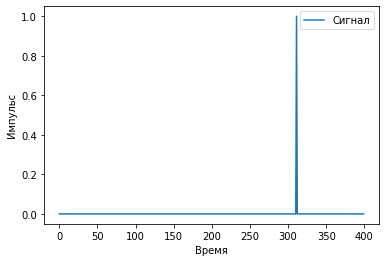

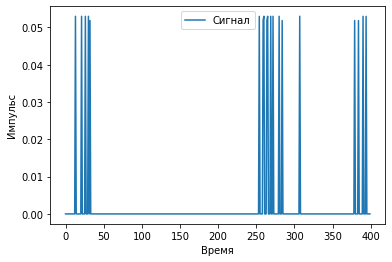

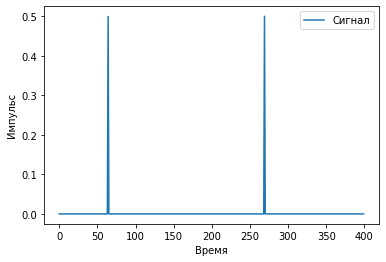

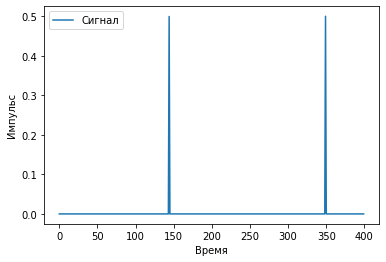

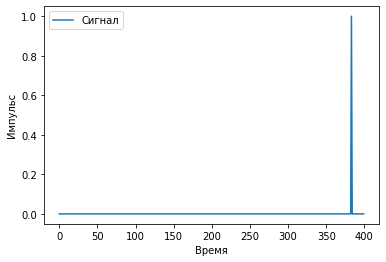

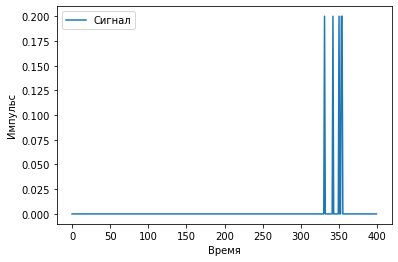

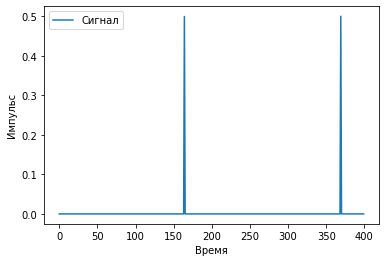

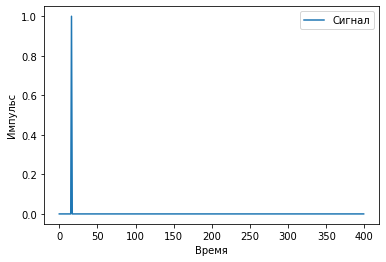

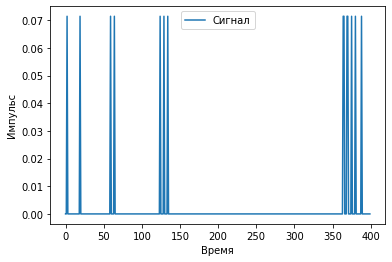

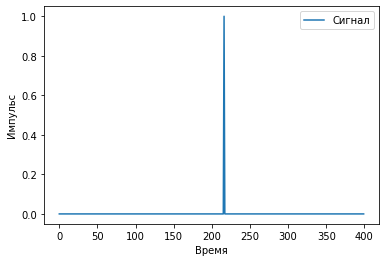

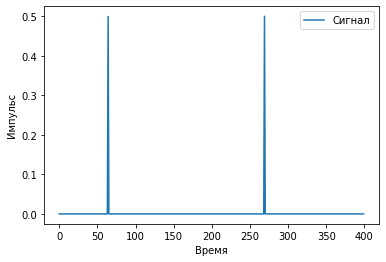

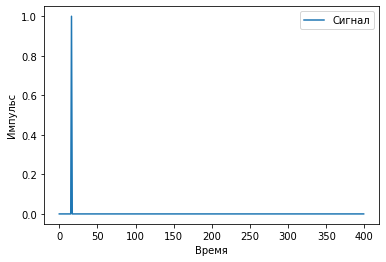

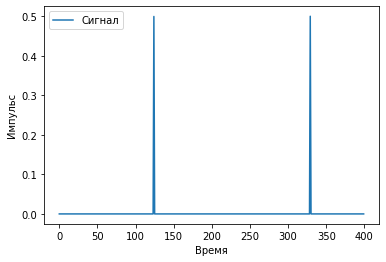

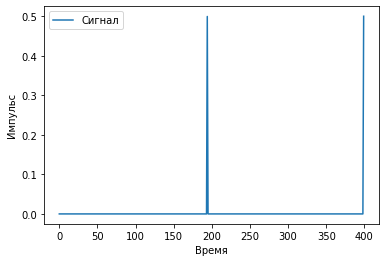

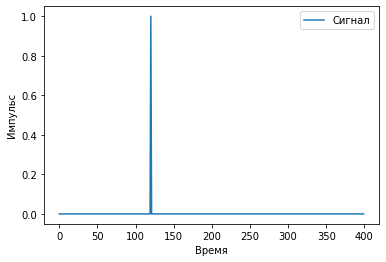

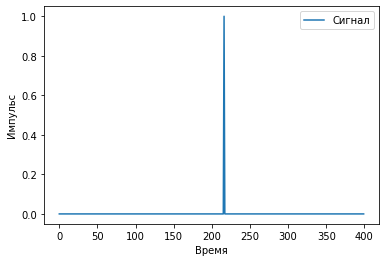

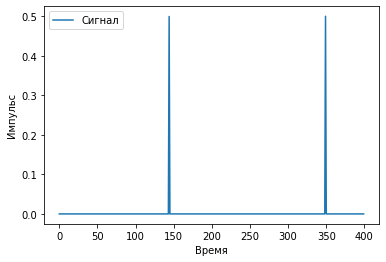

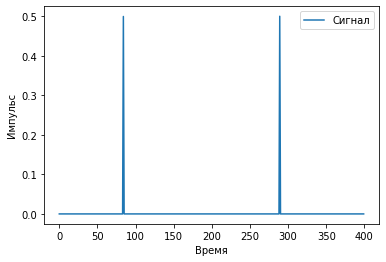

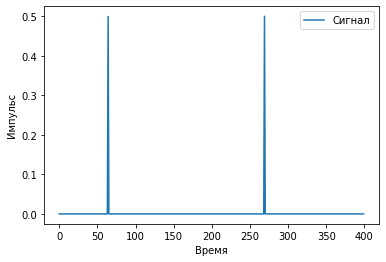

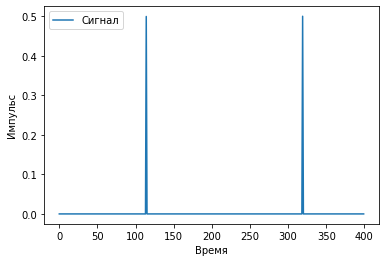

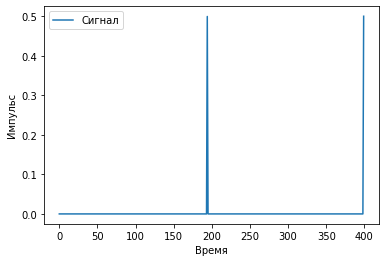

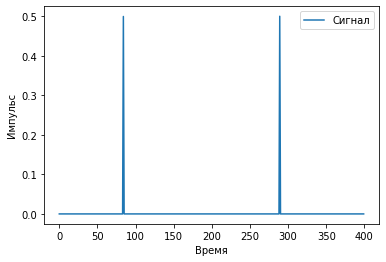

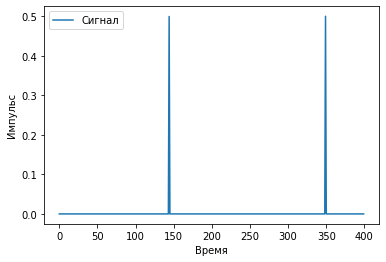

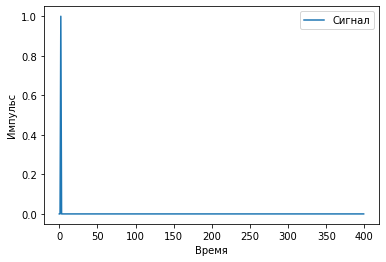

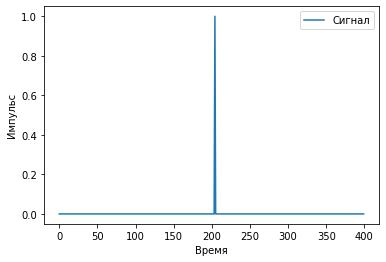

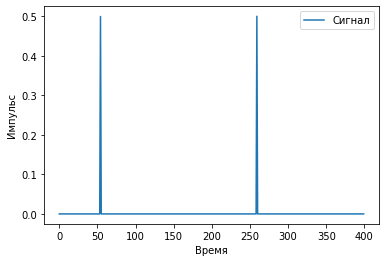

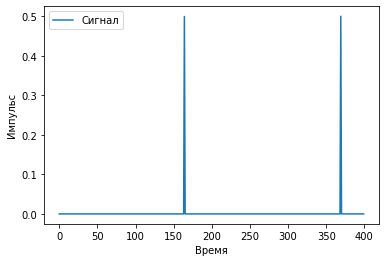

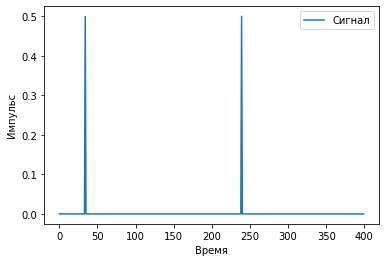

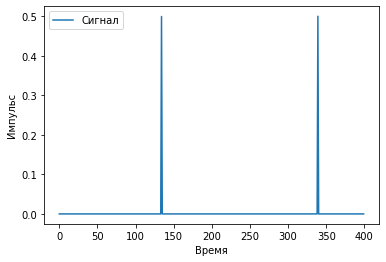

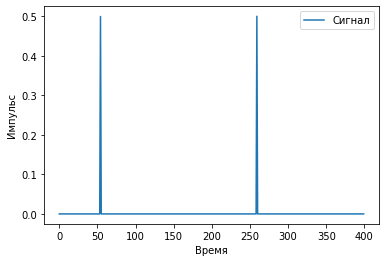

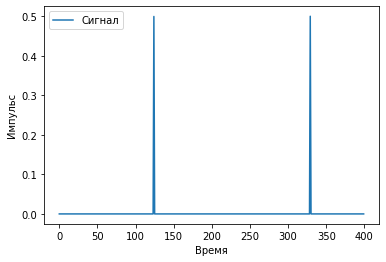

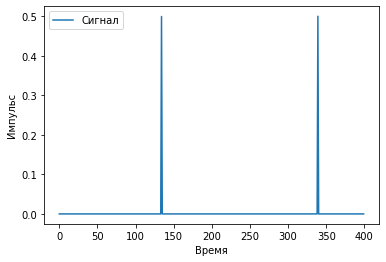

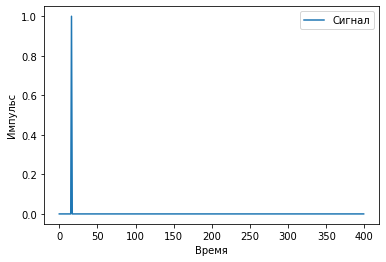

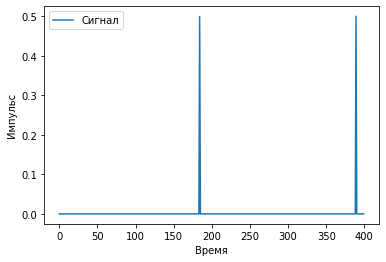

In [2]:
%matplotlib inline

idx = np.random.randint(0, X_train.shape[0], size=100)
for X_i in X_train[idx,:]:
    plt.plot(X_i.reshape(400),
             label='Сигнал')
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()

In [3]:
from scipy import signal
import pickle
import sys
import os
from random import shuffle
    
from scipy import signal


def filter_signal(x):
    N = 10
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs / 2)
    y = signal.lfilter(h, 1.0, x)
    return y

path = "/Users/antonvasilev/PyCharmProjects/emg-interface/nine_movs_six_sub_split/"

# path where you want to save trained model and some other files
sec_path = "./"
persons = [1, 2, 3, 4, 5, 6]

def create_dataset(file_path, persons, moves=None):
    if (moves is None):
        moves = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    
    path = file_path + "{}_{}.pickle"
    sgn = []
    lbl = []
    for i in persons:
        for j in moves:
            with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
                data = pickle.load(fp)

            for k in range(np.shape(data)[0]):
                sgn.append(data[k])
                lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.8 * len(sgn))]
    train_labels = lbl[0:int(0.8 * len(lbl))]
    val_signals = sgn[int(0.8 * len(sgn)):]
    val_labels = lbl[int(0.8 * len(lbl)):]
    # test_signals = sgn[int(0.8*len(sgn)):]
    # test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    # test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels

# only two hand moves take in dataset
moves = [0, 1] # Hand up, hand down
# moves = None # All movements

(X_train2,train_labels,__,___ ) = create_dataset(path, persons, moves)

(593, 400)


In [40]:
from keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
from scipy import signal
from random import shuffle


def _filter_signal(x):
    N = 10
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs / 2)
    y = signal.lfilter(h, 1.0, x)
    return y


def _filter_hz(X):
    """
    Filter the 50 hz noize
    :param X: numpy dataset
    :return:
    """
    X_train_filtered = []
    for X in X:
        X_train_filtered.append(_filter_signal(X))
    X_train_filtered = np.array(X_train_filtered)

    return X_train_filtered


def _filter_avg(X):
    # Moving Average Filter (SMA)
    X_train_filtered_sma0 = []
    for i0 in range(0, X.shape[0]):
        X_train_filtered_sma = []
        last_index = X[i0].shape[0]

        N = 20
        N_half = int(N / 2)

        for i in range(0, last_index):
            X_average = 0
            X_i = X[i0]
            if i >= N_half and i <= last_index - N_half:
                for j in range(i - N_half, i + N_half):
                    X_average += X_i[j]
                X_average /= N
            elif i < N_half:
                for j in range(0, i + N_half):
                    #                 print('+=')
                    #                 print(X_train_scaled[i0][j])
                    X_average += X_i[j]
                X_average /= (i + N_half)
            else:
                for j in range(i - N_half, last_index):
                    X_average += X_i[j]
                X_average /= (last_index - i + N_half)
            #     print('scaled')
            #     print(X_train_scaled[i])
            #     print('average')
            #     print(X_average)
            X_train_filtered_sma.append(X_average)

        #     plt.plot(X_train_scaled[i0],
        #              label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
        #     plt.xlabel('Время')
        #     plt.ylabel('Импульс')
        #     plt.legend()
        #     plt.show()

        #     plt.plot(X_train_filtered_sma,
        #              label='Сигнал avg ' + str(np.argmax(train_labels[i]) + 1))
        #     plt.xlabel('Время')
        #     plt.ylabel('Импульс')
        #     plt.legend()
        #     plt.show()
        #     break
        X_train_filtered_sma0.append(X_train_filtered_sma)

    return X_train_filtered_sma0


def _scale(X):
    """
    Scale data
    :param X:
    :return:
    """

#     X_min =  np.min(X)
#     X_max = np.max(X)
#     print("max: {0}, min: {1}".format(X_max, X_min))
#     X = (X - X_min)/(X_max - X_min)
#     return X
#     scaler = MinMaxScaler()
    scaler = StandardScaler()
    # transform data
    X_train_scaled = scaler.fit_transform(np.array(X))

    return X_train_scaled


def normalize(X):
    X = _filter_hz(X)
    X = _filter_avg(X)
    X = _scale(X)
    return X



def create_dataset(file_path, persons, moves=None):
    """
    Create dataset with 9 movements (indexes: 0 - 8)
    and 6 person (indexes: 1 - 6)
    :param file_path:
    :param persons:
    :param moves:
    :return:
    """
    if (moves is None):
        moves = [0, 1, 2, 3, 4, 5, 6, 7, 8]

    # /Users/antonvasilev/PyCharmProjects/emg-interface/nine_movs_six_sub_split/1_1.pickle
    if file_path[-1] != '/':
        file_path += '/'
    path = file_path + "{}_{}.txt"
    sgn = []
    lbl = []
    for i in persons:
        for j in moves:
            with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
                data = pickle.load(fp)

            for k in range(np.shape(data)[0]):
                sgn.append(data[k])
                lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.8 * len(sgn))]
    train_labels = lbl[0:int(0.8 * len(lbl))]
    val_signals = sgn[int(0.8 * len(sgn)):]
    val_labels = lbl[int(0.8 * len(lbl)):]
    # test_signals = sgn[int(0.8*len(sgn)):]
    # test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    # test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels


(474, 400)
(474, 2)


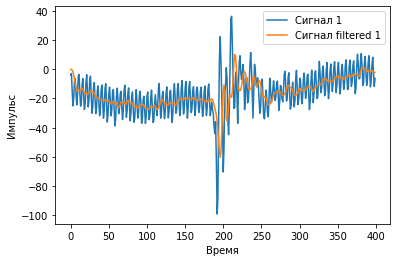

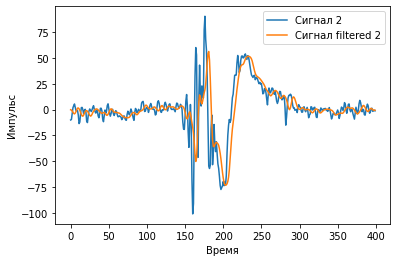

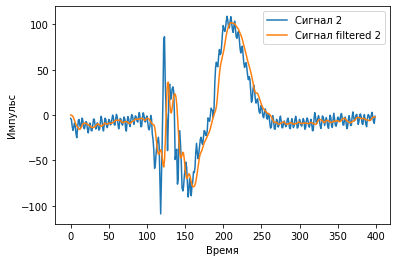

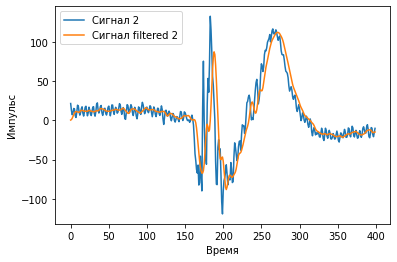

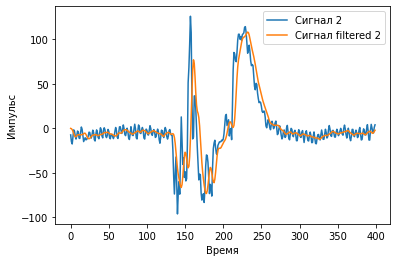

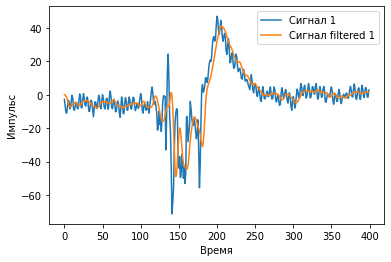

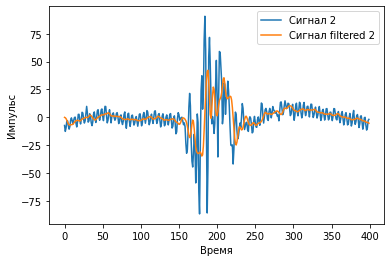

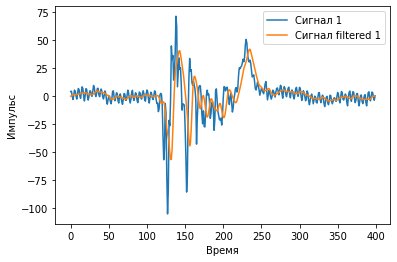

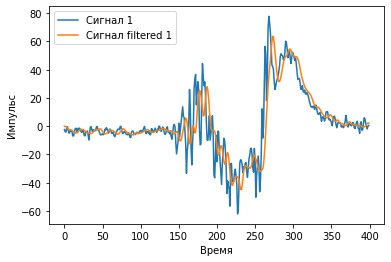

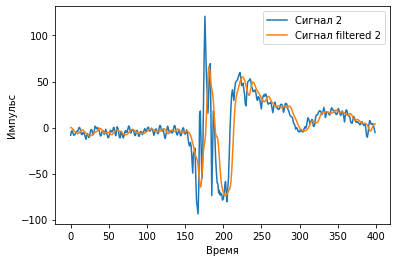

In [5]:
X_train2 = np.array(X_train2)
print(X_train2.shape)
print(train_labels.shape)
idx = np.random.randint(0, X_train2.shape[0], size=10)
X_train_filtered = []
for X in X_train2:
    X_train_filtered.append(filter_signal(X))
X_train_filtered = np.array(X_train_filtered)

for i in idx:
    X_i = X_train2[i]
    plt.plot(X_i,
             label='Сигнал ' + str(np.argmax(train_labels[i]) + 1))
    plt.plot(X_train_filtered[i],
             label='Сигнал filtered ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()


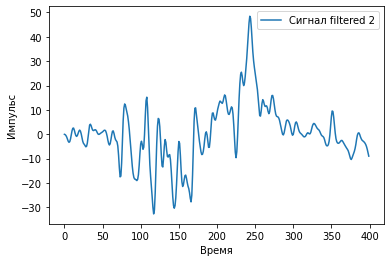

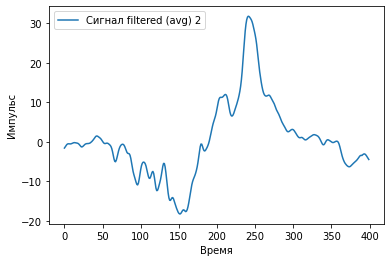

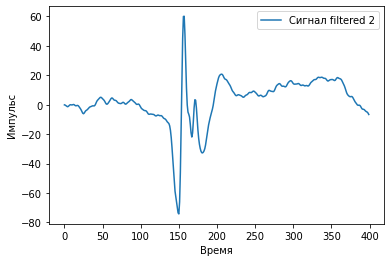

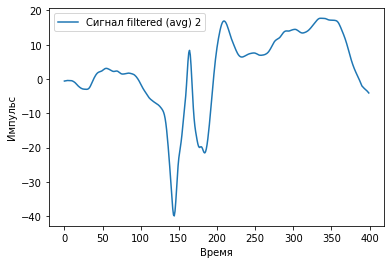

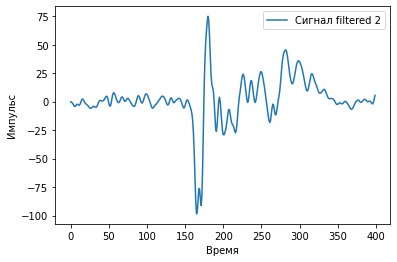

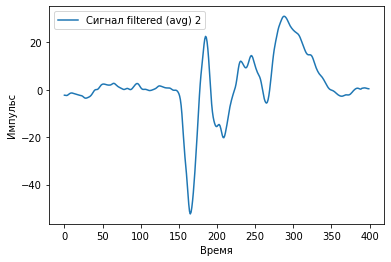

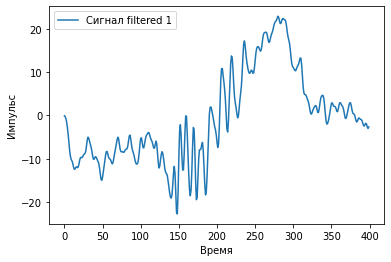

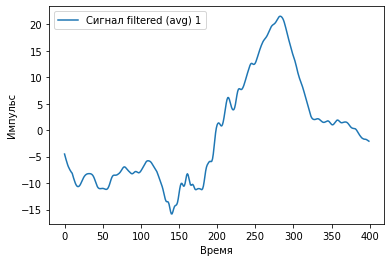

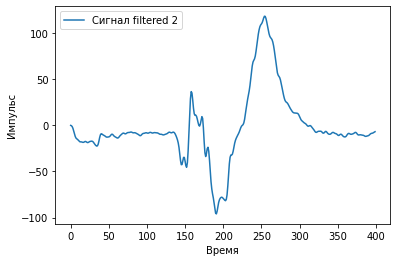

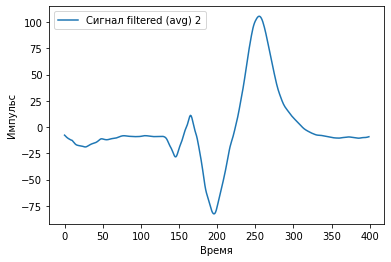

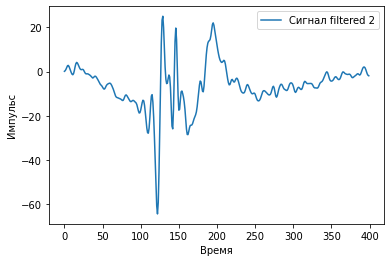

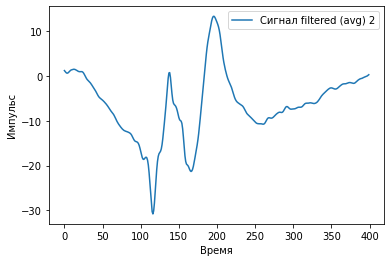

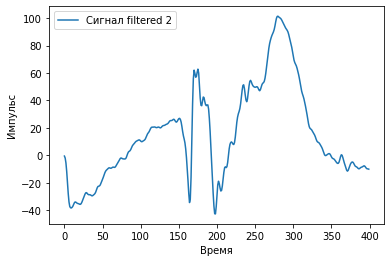

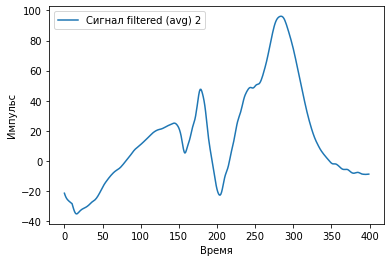

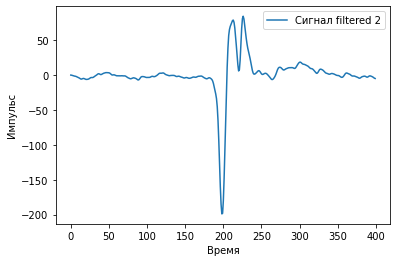

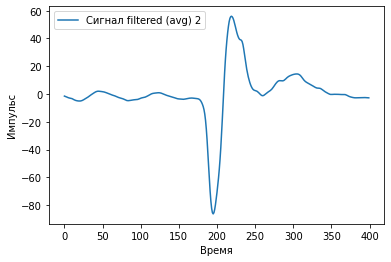

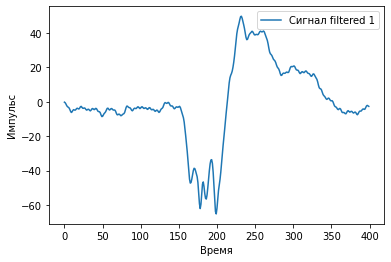

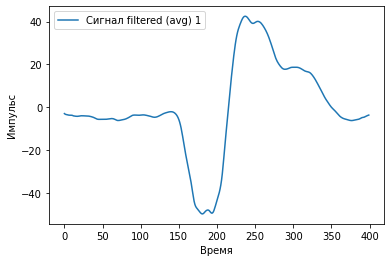

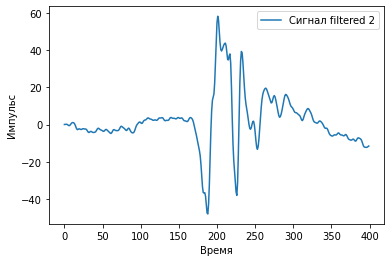

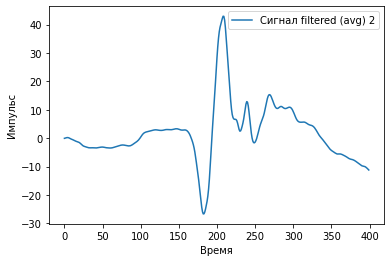

In [6]:
# Moving Average Filter (SMA)
X_train_filtered_sma0 = []
for i0 in range(0, X_train_filtered.shape[0]):
    X_train_filtered_sma = []
    last_index = X_train_filtered[i0].shape[0]

    N = 20
    N_half = int(N / 2)

    for i in range(0, last_index):
        X_average = 0
        X = X_train_filtered[i0]
        if i >= N_half and i <= last_index - N_half:
            for j in range(i - N_half, i + N_half):
                X_average += X[j]
            X_average /= N
        elif i < N_half:
            for j in range(0, i + N_half):
#                 print('+=')
#                 print(X_train_scaled[i0][j])
                X_average += X[j]
            X_average /= (i + N_half)
        else:
            for j in range(i - N_half, last_index):
                X_average += X[j]
            X_average /= (last_index - i + N_half)
    #     print('scaled')
    #     print(X_train_scaled[i])
    #     print('average')
    #     print(X_average)
        X_train_filtered_sma.append(X_average)

#     plt.plot(X_train_scaled[i0],
#              label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
#     plt.xlabel('Время')
#     plt.ylabel('Импульс')
#     plt.legend()
#     plt.show()


#     plt.plot(X_train_filtered_sma,
#              label='Сигнал avg ' + str(np.argmax(train_labels[i]) + 1))
#     plt.xlabel('Время')
#     plt.ylabel('Импульс')
#     plt.legend()
#     plt.show()
#     break
    X_train_filtered_sma0.append(X_train_filtered_sma)

idx = np.random.randint(0, X_train2.shape[0], size=10)
for i in idx:
    X_i = X_train_filtered[i]
    plt.plot(X_i,
             label='Сигнал filtered ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    
    plt.plot(X_train_filtered_sma0[i],
             label='Сигнал filtered (avg) ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()

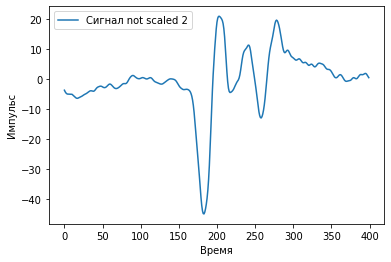

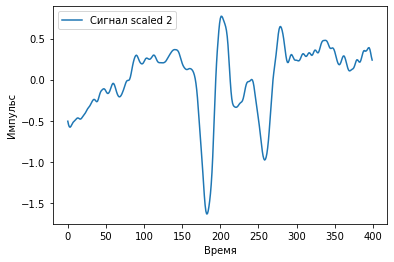

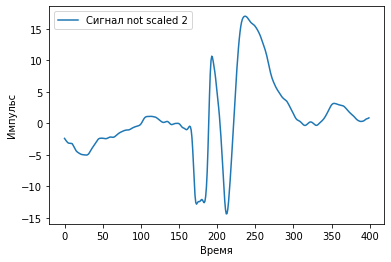

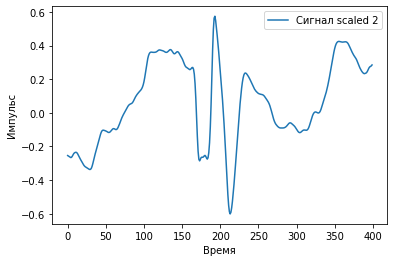

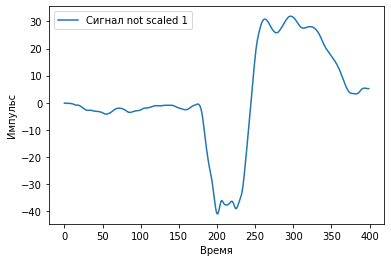

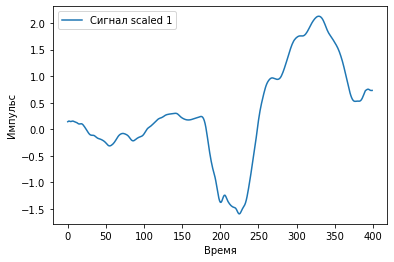

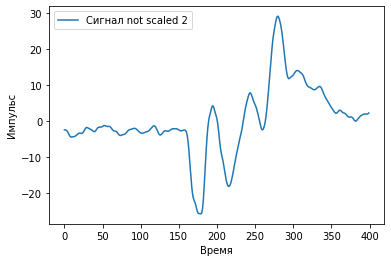

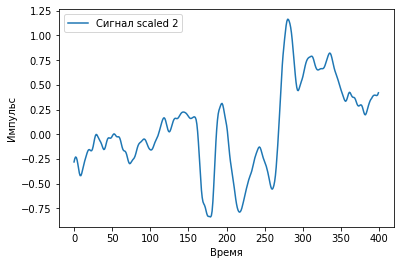

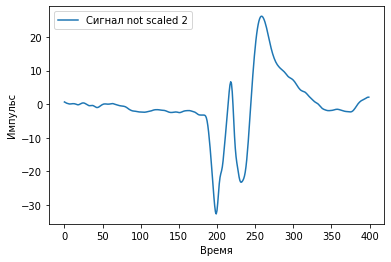

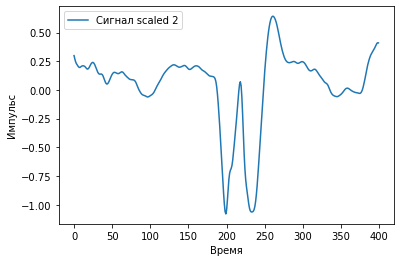

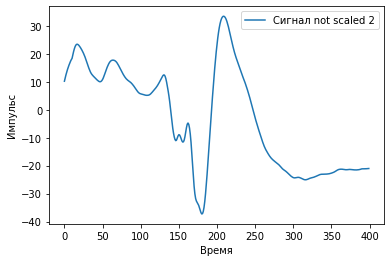

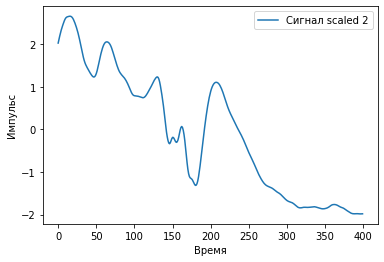

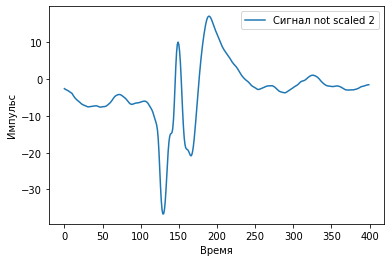

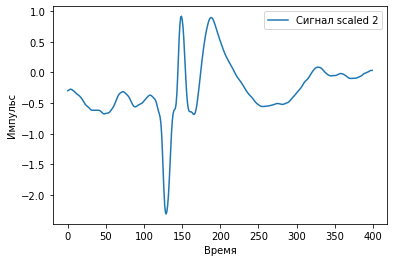

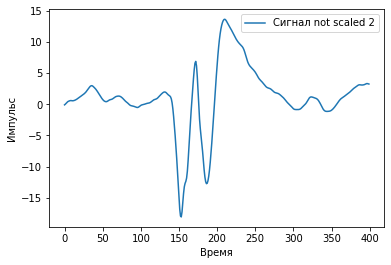

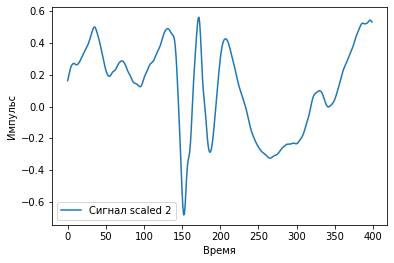

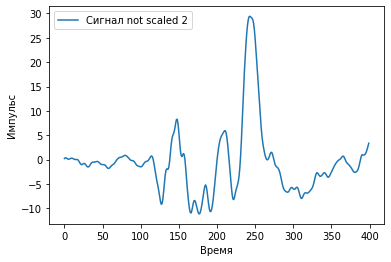

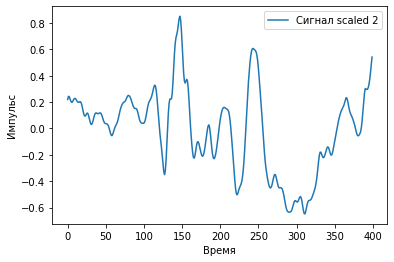

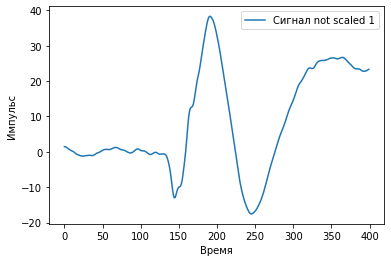

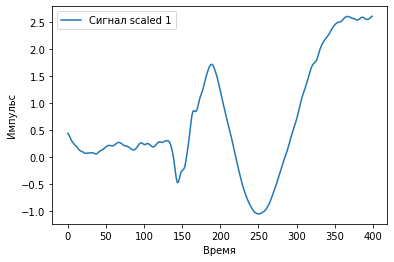

In [7]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

idx = np.random.randint(0, X_train2.shape[0], size=10)

scaler = StandardScaler()
# scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(np.array(X_train_filtered_sma0))
# print(scaled)

for i in idx:
    X_i = X_train_filtered_sma0[i]
    plt.plot(X_i,
             label='Сигнал not scaled ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    
    plt.plot(X_train_scaled[i],
             label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    



In [8]:
EPOCH_COUNT = 250

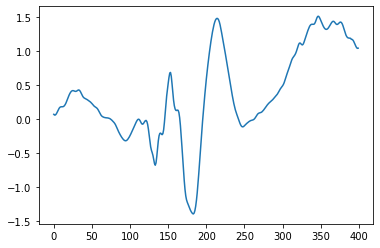

In [39]:
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten

def build_dense_model(input_size, num_sensors, num_classes):
    """
    Simple Dense model
    """
    model = Sequential()
    # FFNN
    model.add(Dense(256, input_dim=400, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))


    opt = Adam(learning_rate=0.01)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    
    return model
    
def dense_fit(X_train_res, Y_train_res):
    # Model dense
    # X_train_res = X_train
    # Y_train_res = one_hot_labels
    X_train_res = X_train_scaled # X_train_filtered # X_train2
    Y_train_res = train_labels

    # filtration

    # row_sums = X_train_res.sum(axis=1)
    # X_train_res = X_train_res / row_sums[:, np.newaxis]

    num_classes = Y_train_res.shape[1]
    time_series = X_train_res.shape[1]

    model_ffnn = build_dense_model(time_series, 1, num_classes)
    model_ffnn.summary()
    # Train the model, iterating on the data in batches of 32 samples
    history_ffnn = model_ffnn.fit(X_train_res, Y_train_res, epochs=EPOCH_COUNT, batch_size=100, validation_split=0.3)
    
    return model_ffnn, history_ffnn

# model_ffnn, history_ffnn = dense_fit(X_train_res, Y_train_res)
plt.plot(X_train_res[0])
plt.show()


In [10]:
# Conv1D
from keras.layers import Conv1D
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten, GlobalAveragePooling1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Model dense
# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_scaled # X_train_filtered # X_train2
Y_train_res = train_labels

def build_conv1d_model(input_size, num_sensors, num_classes):
    """
    Conv 1D model
    """
    
    model = Sequential()
    # Conv1d
    model.add(Reshape((input_size, num_sensors), input_shape=(input_size,)))
    model.add(Conv1D(25, 80, activation='relu', input_shape=(input_size, num_sensors)))
    model.add(Conv1D(25, 6, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(16, 6, activation='relu'))
    model.add(Conv1D(12, 4, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))



    opt = Adam(learning_rate=0.01)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    
    return model

def conv1d_fit(X_train_res, Y_train_res):
    num_classes = Y_train_res.shape[1]
    time_series = X_train_res.shape[1]
    num_sensors = 1

    model_conv1 = build_conv1d_model(time_series, num_sensors, num_classes)

    # The EarlyStopping callback monitors training accuracy:
    # if it fails to improve for two consecutive epochs,
    # training stops early
    callbacks_list = [
        ModelCheckpoint(
            filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
            monitor='val_loss', save_best_only=True),
        EarlyStopping(monitor='accuracy', patience=1)
    ]

    # Train the model, iterating on the data in batches of 32 samples
    history_conv1 = model_conv1.fit(X_train_res, Y_train_res, epochs=EPOCH_COUNT, batch_size=100, validation_split=0.3
    #                                 , callbacks=callbacks_list
                                   )
    
    return model_conv1, history_conv1


model_conv1, history_conv1 = conv1d_fit(X_train_res, Y_train_res)


Epoch 1/250
4/4 [==============================] - 1s 103ms/step - loss: 0.7121 - accuracy: 0.4743 - val_loss: 0.6819 - val_accuracy: 0.5734
Epoch 2/250
4/4 [==============================] - 0s 44ms/step - loss: 0.6964 - accuracy: 0.4622 - val_loss: 0.6815 - val_accuracy: 0.6014
Epoch 3/250
4/4 [==============================] - 0s 44ms/step - loss: 0.6867 - accuracy: 0.5770 - val_loss: 0.6496 - val_accuracy: 0.6713
Epoch 4/250
4/4 [==============================] - 0s 42ms/step - loss: 0.6751 - accuracy: 0.5740 - val_loss: 0.6378 - val_accuracy: 0.6923
Epoch 5/250
4/4 [==============================] - 0s 42ms/step - loss: 0.6663 - accuracy: 0.5650 - val_loss: 0.6138 - val_accuracy: 0.7692
Epoch 6/250
4/4 [==============================] - 0s 43ms/step - loss: 0.6421 - accuracy: 0.6707 - val_loss: 0.5560 - val_accuracy: 0.7133
Epoch 7/250
4/4 [==============================] - 0s 40ms/step - loss: 0.6215 - accuracy: 0.6888 - val_loss: 0.5494 - val_accuracy: 0.8042
Epoch 8/250
4/4 [==

4/4 [==============================] - 0s 38ms/step - loss: 0.3491 - accuracy: 0.8610 - val_loss: 0.5246 - val_accuracy: 0.8112
Epoch 60/250
4/4 [==============================] - 0s 41ms/step - loss: 0.3386 - accuracy: 0.8520 - val_loss: 0.6737 - val_accuracy: 0.8531
Epoch 61/250
4/4 [==============================] - 0s 40ms/step - loss: 0.3364 - accuracy: 0.8640 - val_loss: 0.6987 - val_accuracy: 0.8531
Epoch 62/250
4/4 [==============================] - 0s 42ms/step - loss: 0.2844 - accuracy: 0.8973 - val_loss: 0.5513 - val_accuracy: 0.8322
Epoch 63/250
4/4 [==============================] - 0s 43ms/step - loss: 0.2892 - accuracy: 0.8792 - val_loss: 0.6910 - val_accuracy: 0.8462
Epoch 64/250
4/4 [==============================] - 0s 47ms/step - loss: 0.2532 - accuracy: 0.9003 - val_loss: 0.5556 - val_accuracy: 0.8322
Epoch 65/250
4/4 [==============================] - 0s 43ms/step - loss: 0.2711 - accuracy: 0.8912 - val_loss: 0.7243 - val_accuracy: 0.8462
Epoch 66/250
4/4 [========

4/4 [==============================] - 0s 42ms/step - loss: 0.1591 - accuracy: 0.9486 - val_loss: 0.7725 - val_accuracy: 0.8601
Epoch 118/250
4/4 [==============================] - 0s 39ms/step - loss: 0.1388 - accuracy: 0.9637 - val_loss: 0.6850 - val_accuracy: 0.8811
Epoch 119/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1510 - accuracy: 0.9547 - val_loss: 0.8791 - val_accuracy: 0.8671
Epoch 120/250
4/4 [==============================] - 0s 45ms/step - loss: 0.1352 - accuracy: 0.9637 - val_loss: 0.7174 - val_accuracy: 0.8601
Epoch 121/250
4/4 [==============================] - 0s 42ms/step - loss: 0.1410 - accuracy: 0.9637 - val_loss: 0.7934 - val_accuracy: 0.8531
Epoch 122/250
4/4 [==============================] - 0s 47ms/step - loss: 0.1325 - accuracy: 0.9547 - val_loss: 0.8956 - val_accuracy: 0.8601
Epoch 123/250
4/4 [==============================] - 0s 43ms/step - loss: 0.1206 - accuracy: 0.9668 - val_loss: 0.8015 - val_accuracy: 0.8601
Epoch 124/250
4/4 [=

Epoch 175/250
4/4 [==============================] - 0s 40ms/step - loss: 0.1048 - accuracy: 0.9637 - val_loss: 1.7067 - val_accuracy: 0.8462
Epoch 176/250
4/4 [==============================] - 0s 38ms/step - loss: 0.1003 - accuracy: 0.9789 - val_loss: 1.4952 - val_accuracy: 0.8601
Epoch 177/250
4/4 [==============================] - 0s 39ms/step - loss: 0.1265 - accuracy: 0.9607 - val_loss: 1.2269 - val_accuracy: 0.8112
Epoch 178/250
4/4 [==============================] - 0s 41ms/step - loss: 0.4108 - accuracy: 0.9124 - val_loss: 1.4082 - val_accuracy: 0.6154
Epoch 179/250
4/4 [==============================] - 0s 38ms/step - loss: 0.6231 - accuracy: 0.7915 - val_loss: 2.3028 - val_accuracy: 0.8112
Epoch 180/250
4/4 [==============================] - 0s 39ms/step - loss: 0.4471 - accuracy: 0.8912 - val_loss: 1.0358 - val_accuracy: 0.7483
Epoch 181/250
4/4 [==============================] - 0s 40ms/step - loss: 0.3564 - accuracy: 0.8520 - val_loss: 0.9261 - val_accuracy: 0.8182
Epoch 

Epoch 233/250
4/4 [==============================] - 0s 46ms/step - loss: 0.1039 - accuracy: 0.9728 - val_loss: 1.8062 - val_accuracy: 0.8182
Epoch 234/250
4/4 [==============================] - 0s 40ms/step - loss: 0.1051 - accuracy: 0.9698 - val_loss: 1.7893 - val_accuracy: 0.8322
Epoch 235/250
4/4 [==============================] - 0s 50ms/step - loss: 0.0934 - accuracy: 0.9789 - val_loss: 1.6266 - val_accuracy: 0.8182
Epoch 236/250
4/4 [==============================] - 0s 50ms/step - loss: 0.0998 - accuracy: 0.9758 - val_loss: 1.8343 - val_accuracy: 0.8182
Epoch 237/250
4/4 [==============================] - 0s 43ms/step - loss: 0.0863 - accuracy: 0.9789 - val_loss: 1.8988 - val_accuracy: 0.8042
Epoch 238/250
4/4 [==============================] - 0s 44ms/step - loss: 0.0804 - accuracy: 0.9819 - val_loss: 1.6866 - val_accuracy: 0.8042
Epoch 239/250
4/4 [==============================] - 0s 44ms/step - loss: 0.0853 - accuracy: 0.9819 - val_loss: 1.7776 - val_accuracy: 0.8042
Epoch 

In [11]:
# Model LSTM
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten

# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_scaled # X_train_filtered # X_train2
Y_train_res = train_labels


def build_lstm_model(input_size, num_sensors, num_classes):
    """
    LSTM model
    """
    
    model = Sequential()
    # RNN
    model.add(Reshape((40, 10), input_shape=(input_size,)))
    model.add(LSTM(units=64,return_sequences=True,input_shape=(None, 40, 10)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=16,return_sequences=True))
    model.add(Dropout(0.2))
    # model.add(LSTM(units=50,return_sequences=True))
    # model.add(Dropout(0.2))
    # model.add(LSTM(units=50))
    # model.add(Dropout(0.2))

    # FFNN
    # model.add(Dense(256, input_dim=400, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(Dense(128, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(BatchNormalization())
    # model.add(Dense(64, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Flatten())
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add((Dense(32, activation='relu')))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))


    opt = Adam(learning_rate=0.001)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])
    
    return model

    
def lstm_fit(X_train_res, Y_train_res):
    num_classes = Y_train_res.shape[1]
    time_series = X_train_res.shape[1]

    model = build_lstm_model(time_series, 1, num_classes)
    
    # Train the model, iterating on the data in batches of 32 samples
    history = model.fit(X_train_res, Y_train_res, epochs=EPOCH_COUNT, batch_size=100, validation_split=0.3)

    return model, history


model, history = lstm_fit(X_train_res, Y_train_res)

Epoch 1/250
4/4 [==============================] - 4s 280ms/step - loss: 1.0209 - accuracy: 0.4804 - val_loss: 0.6757 - val_accuracy: 0.6364
Epoch 2/250
4/4 [==============================] - 0s 45ms/step - loss: 0.8000 - accuracy: 0.5287 - val_loss: 0.6718 - val_accuracy: 0.6434
Epoch 3/250
4/4 [==============================] - 0s 50ms/step - loss: 0.7788 - accuracy: 0.5317 - val_loss: 0.6690 - val_accuracy: 0.6434
Epoch 4/250
4/4 [==============================] - 0s 48ms/step - loss: 0.7957 - accuracy: 0.5076 - val_loss: 0.6670 - val_accuracy: 0.6434
Epoch 5/250
4/4 [==============================] - 0s 50ms/step - loss: 0.7520 - accuracy: 0.5740 - val_loss: 0.6643 - val_accuracy: 0.6154
Epoch 6/250
4/4 [==============================] - 0s 68ms/step - loss: 0.6962 - accuracy: 0.5801 - val_loss: 0.6598 - val_accuracy: 0.6224
Epoch 7/250
4/4 [==============================] - 0s 41ms/step - loss: 0.6948 - accuracy: 0.6042 - val_loss: 0.6556 - val_accuracy: 0.6434
Epoch 8/250
4/4 [==

4/4 [==============================] - 0s 41ms/step - loss: 0.3450 - accuracy: 0.8308 - val_loss: 0.4799 - val_accuracy: 0.7972
Epoch 60/250
4/4 [==============================] - 0s 40ms/step - loss: 0.3421 - accuracy: 0.8399 - val_loss: 0.4675 - val_accuracy: 0.7902
Epoch 61/250
4/4 [==============================] - 0s 43ms/step - loss: 0.3149 - accuracy: 0.8550 - val_loss: 0.4755 - val_accuracy: 0.7832
Epoch 62/250
4/4 [==============================] - 0s 42ms/step - loss: 0.2996 - accuracy: 0.8701 - val_loss: 0.4824 - val_accuracy: 0.7622
Epoch 63/250
4/4 [==============================] - 0s 41ms/step - loss: 0.3100 - accuracy: 0.8429 - val_loss: 0.5270 - val_accuracy: 0.7413
Epoch 64/250
4/4 [==============================] - 0s 41ms/step - loss: 0.3141 - accuracy: 0.8701 - val_loss: 0.5019 - val_accuracy: 0.7692
Epoch 65/250
4/4 [==============================] - 0s 41ms/step - loss: 0.3161 - accuracy: 0.8701 - val_loss: 0.4663 - val_accuracy: 0.7832
Epoch 66/250
4/4 [========

4/4 [==============================] - 0s 40ms/step - loss: 0.1444 - accuracy: 0.9456 - val_loss: 0.4291 - val_accuracy: 0.8322
Epoch 118/250
4/4 [==============================] - 0s 40ms/step - loss: 0.1407 - accuracy: 0.9637 - val_loss: 0.4489 - val_accuracy: 0.8531
Epoch 119/250
4/4 [==============================] - 0s 39ms/step - loss: 0.1181 - accuracy: 0.9668 - val_loss: 0.4685 - val_accuracy: 0.8392
Epoch 120/250
4/4 [==============================] - 0s 39ms/step - loss: 0.1442 - accuracy: 0.9366 - val_loss: 0.4317 - val_accuracy: 0.8601
Epoch 121/250
4/4 [==============================] - 0s 39ms/step - loss: 0.1634 - accuracy: 0.9245 - val_loss: 0.4690 - val_accuracy: 0.8392
Epoch 122/250
4/4 [==============================] - 0s 41ms/step - loss: 0.1219 - accuracy: 0.9607 - val_loss: 0.5057 - val_accuracy: 0.8531
Epoch 123/250
4/4 [==============================] - 0s 40ms/step - loss: 0.1194 - accuracy: 0.9607 - val_loss: 0.4699 - val_accuracy: 0.8671
Epoch 124/250
4/4 [=

Epoch 175/250
4/4 [==============================] - 0s 58ms/step - loss: 0.0660 - accuracy: 0.9789 - val_loss: 0.5986 - val_accuracy: 0.8811
Epoch 176/250
4/4 [==============================] - 0s 53ms/step - loss: 0.0590 - accuracy: 0.9758 - val_loss: 0.6021 - val_accuracy: 0.8881
Epoch 177/250
4/4 [==============================] - 0s 57ms/step - loss: 0.0951 - accuracy: 0.9668 - val_loss: 0.5406 - val_accuracy: 0.8811
Epoch 178/250
4/4 [==============================] - 0s 48ms/step - loss: 0.0549 - accuracy: 0.9819 - val_loss: 0.5407 - val_accuracy: 0.8671
Epoch 179/250
4/4 [==============================] - 0s 51ms/step - loss: 0.0438 - accuracy: 0.9819 - val_loss: 0.5589 - val_accuracy: 0.8671
Epoch 180/250
4/4 [==============================] - 0s 52ms/step - loss: 0.0525 - accuracy: 0.9849 - val_loss: 0.6135 - val_accuracy: 0.8601
Epoch 181/250
4/4 [==============================] - 0s 47ms/step - loss: 0.0468 - accuracy: 0.9879 - val_loss: 0.6488 - val_accuracy: 0.8531
Epoch 

Epoch 233/250
4/4 [==============================] - 0s 41ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.5442 - val_accuracy: 0.8462
Epoch 234/250
4/4 [==============================] - 0s 44ms/step - loss: 0.0445 - accuracy: 0.9849 - val_loss: 0.5751 - val_accuracy: 0.8531
Epoch 235/250
4/4 [==============================] - 0s 42ms/step - loss: 0.0448 - accuracy: 0.9819 - val_loss: 0.6815 - val_accuracy: 0.8671
Epoch 236/250
4/4 [==============================] - 0s 41ms/step - loss: 0.0403 - accuracy: 0.9909 - val_loss: 0.7871 - val_accuracy: 0.8392
Epoch 237/250
4/4 [==============================] - 0s 41ms/step - loss: 0.0266 - accuracy: 0.9940 - val_loss: 0.7966 - val_accuracy: 0.8182
Epoch 238/250
4/4 [==============================] - 0s 49ms/step - loss: 0.0478 - accuracy: 0.9789 - val_loss: 0.6167 - val_accuracy: 0.8392
Epoch 239/250
4/4 [==============================] - 0s 41ms/step - loss: 0.0287 - accuracy: 0.9940 - val_loss: 0.5641 - val_accuracy: 0.8531
Epoch 

NameError: name 'history_ffnn' is not defined

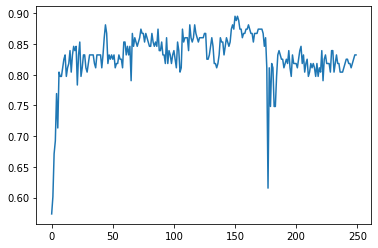

In [12]:
plt.plot(history_conv1.history['val_accuracy'],
        label='val_acc [conv1]')
# plt.plot(history_ffnn.history['accuracy'],
#          label='val [ffnn]')
plt.plot(history_ffnn.history['val_accuracy'],
         label='val_acc [ffnn]')


# plt.plot(history.history['accuracy'],
#          label='val [rnn]')
plt.plot(history.history['val_accuracy'],
         label='val_acc [rnn]')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.savefig('simple_rnn_history_with_2_moves_normal_data.png')

In [13]:
# compare models
print('accurace conv1')
print(model_conv1.evaluate(X_train_res, Y_train_res)[1])
print('accurace ffnn')
print(model_ffnn.evaluate(X_train_res, Y_train_res)[1])
print('accurace rnn')
print(model.evaluate(X_train_res, Y_train_res)[1])

accurace conv1
15/15 [==============================] - 0s 4ms/step - loss: 0.7171 - accuracy: 0.9388
0.9388185739517212
accurace ffnn


NameError: name 'model_ffnn' is not defined

In [ ]:
index = np.random.randint(0, X_train_res.shape[0] - 1, 1)[0]
print(index)
y_pred = model.predict(np.array(X_train_res[index:index+1]))
print(X_train[index:index+1])
# print('X_pred')
# print(X_train[0:1])
print('y_pred')
print(y_pred)
print('y_real')
print(Y_train_res[index])
print('Is corrrect?')
print(np.argmax(y_pred) == np.argmax(Y_train_res[index]))

plt.plot(X_train_res[index],
         label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Импульс')
plt.legend()
plt.savefig('emg_example.png')

In [42]:

# Ищем проблему в моделях

# Берем сначала по 1 пользователю и пару действий и смотрим точность на каждой модели
# После увеличиваем количество людей и действий. Смотрим, где начинает возникать ошибка

# Максимум 1-6 человек
persons_iterator = [
#     [1],
#     [1, 2],
#     [1, 3],
#     [1, 4],
#     [1, 5],
#     [1, 6],
#     [1,2,3]
    [1,2,3],
#     [1,2,3,4,5,6]
]
# Максимум 0-8 жестов
movements_iterator = [
    [0, 1],
#     [0, 1, 2],
#     [0, 1, 2, 3, 4, 5],
#     [0, 1, 2, 3, 4, 5, 6, 7, 8],
]
# Путь к набору данных
path = os.path.abspath('./data/rf-lab/nine_movs_six_sub_split/')

def model_iterator_factory(data_length, num_sensors, num_classes):
    """
    Создает список моделей, которые мы тестируем
    """
#     print('model_iterator_factory')
    models = []
    dense_model = build_dense_model(data_length, num_sensors, num_classes)
#     dense_model.summary()
    models.append(dense_model)
    conv_model = build_conv1d_model(data_length, num_sensors, num_classes)
#     conv_model.summary()
    models.append(conv_model)
    lstm_model = build_lstm_model(data_length, num_sensors, num_classes)
#     lstm_model.summary()
    models.append(lstm_model)
    return models


EPOCH_COUNT = 100

# hs.write(name)
# hs.close() 
hs = open("fit_results.txt","w")
hs.close()
# Результаты обучения
fit_result = {}
# Индексы для итерирования
person_index = 0
# Перебираем комбинации людей
for persons in persons_iterator:
    movements_index = 0
    fit_result[person_index] = {}
    # Для каждой комбинации людей - проверяем все виды жестов в датасете
    for movements in movements_iterator:
        X_train, y_train, X_test, y_test = create_dataset(path, persons, movements)
#         X_train = normalize(X_train)
        X_test = normalize(X_test)
#         plt.plot(X_train[0])
#         plt.show()
        X_train = normalize(X_train)
#         plt.plot(X_train[0])
#         plt.show()
#         X_test = normalize(X_test)
#         continue
        
        models = model_iterator_factory(X_train.shape[1], 1, len(movements))
        model_index = 0
        fit_result[person_index][movements_index] = {}
        # Тут сравниваем 3 модели для каждой
        for i in range(0, len(models)):
            model_ = models[i]
            model_.summary()
#             continue
            # обучаем модель и оцениваем результат
            history = model_.fit(X_train, y_train, epochs=EPOCH_COUNT, batch_size=25, validation_split=0.3, verbose=2)
#             model.evaluate(X_train, y_train)[1]
            
            evaluate_result = model_.evaluate(X_test, y_test)
#             fit_result[person_index][movements_index][model_index] = {
# #                 'history': history,
# #                 'model': model,
#                 'accuracy': evaluate_result[1]
#             }

            hs = open("fit_results.txt","a")
            hs.write("persons: {0}, moves: {1}, model {5}: {2}, accuracy: {3}, loss: {4}\n".format(
                person_index,
                movements_index,
                model_index,
                evaluate_result[1],
                evaluate_result[0],
                hash(model_)
            ))
            hs.close()
#             plt.plot(history.history['val_accuracy'],
#                      label='val_acc')
#             plt.plot(history.history['accuracy'],
#                      label='acc')
#             plt.xlabel('Эпоха обучения')
#             plt.ylabel('Доля верных ответов')
#             plt.legend()
#             plt.show()
#             break
            model_index += 1
        movements_index += 1
    person_index += 1    
        

# print(fit_result)

(287, 400)
Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_213 (Dense)           (None, 256)               102656    
                                                                 
 dropout_205 (Dropout)       (None, 256)               0         
                                                                 
 dense_214 (Dense)           (None, 128)               32896     
                                                                 
 dropout_206 (Dropout)       (None, 128)               0         
                                                                 
 batch_normalization_65 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_215 (Dense)           (None, 64)                8256      
                                          

Epoch 50/100
7/7 - 0s - loss: 0.2821 - accuracy: 0.9000 - val_loss: 0.9986 - val_accuracy: 0.7101 - 37ms/epoch - 5ms/step
Epoch 51/100
7/7 - 0s - loss: 0.3338 - accuracy: 0.8813 - val_loss: 1.0051 - val_accuracy: 0.7101 - 37ms/epoch - 5ms/step
Epoch 52/100
7/7 - 0s - loss: 0.2763 - accuracy: 0.8813 - val_loss: 0.8915 - val_accuracy: 0.7391 - 37ms/epoch - 5ms/step
Epoch 53/100
7/7 - 0s - loss: 0.2802 - accuracy: 0.9062 - val_loss: 0.7723 - val_accuracy: 0.7391 - 36ms/epoch - 5ms/step
Epoch 54/100
7/7 - 0s - loss: 0.3248 - accuracy: 0.8562 - val_loss: 0.8383 - val_accuracy: 0.7536 - 39ms/epoch - 6ms/step
Epoch 55/100
7/7 - 0s - loss: 0.3347 - accuracy: 0.8750 - val_loss: 0.8017 - val_accuracy: 0.7391 - 37ms/epoch - 5ms/step
Epoch 56/100
7/7 - 0s - loss: 0.2712 - accuracy: 0.8750 - val_loss: 0.7521 - val_accuracy: 0.7536 - 36ms/epoch - 5ms/step
Epoch 57/100
7/7 - 0s - loss: 0.2933 - accuracy: 0.8875 - val_loss: 0.6881 - val_accuracy: 0.7536 - 37ms/epoch - 5ms/step
Epoch 58/100
7/7 - 0s - 

Epoch 3/100
7/7 - 0s - loss: 0.6815 - accuracy: 0.5625 - val_loss: 0.6641 - val_accuracy: 0.5942 - 123ms/epoch - 18ms/step
Epoch 4/100
7/7 - 0s - loss: 0.6610 - accuracy: 0.6000 - val_loss: 0.6371 - val_accuracy: 0.5942 - 107ms/epoch - 15ms/step
Epoch 5/100
7/7 - 0s - loss: 0.6381 - accuracy: 0.5938 - val_loss: 0.6084 - val_accuracy: 0.6232 - 104ms/epoch - 15ms/step
Epoch 6/100
7/7 - 0s - loss: 0.6202 - accuracy: 0.6250 - val_loss: 0.5745 - val_accuracy: 0.7246 - 100ms/epoch - 14ms/step
Epoch 7/100
7/7 - 0s - loss: 0.6073 - accuracy: 0.6250 - val_loss: 0.5862 - val_accuracy: 0.6377 - 106ms/epoch - 15ms/step
Epoch 8/100
7/7 - 0s - loss: 0.6124 - accuracy: 0.6438 - val_loss: 0.5760 - val_accuracy: 0.6087 - 100ms/epoch - 14ms/step
Epoch 9/100
7/7 - 0s - loss: 0.5696 - accuracy: 0.5938 - val_loss: 0.6301 - val_accuracy: 0.4928 - 99ms/epoch - 14ms/step
Epoch 10/100
7/7 - 0s - loss: 0.5060 - accuracy: 0.6562 - val_loss: 0.5310 - val_accuracy: 0.7391 - 96ms/epoch - 14ms/step
Epoch 11/100
7/7 

Epoch 70/100
7/7 - 0s - loss: 0.2338 - accuracy: 0.9000 - val_loss: 0.3750 - val_accuracy: 0.8551 - 110ms/epoch - 16ms/step
Epoch 71/100
7/7 - 0s - loss: 0.2367 - accuracy: 0.9000 - val_loss: 0.4400 - val_accuracy: 0.8116 - 103ms/epoch - 15ms/step
Epoch 72/100
7/7 - 0s - loss: 0.2321 - accuracy: 0.9062 - val_loss: 0.4476 - val_accuracy: 0.8261 - 100ms/epoch - 14ms/step
Epoch 73/100
7/7 - 0s - loss: 0.1509 - accuracy: 0.9688 - val_loss: 0.7309 - val_accuracy: 0.8261 - 100ms/epoch - 14ms/step
Epoch 74/100
7/7 - 0s - loss: 0.1784 - accuracy: 0.9438 - val_loss: 0.7175 - val_accuracy: 0.7971 - 101ms/epoch - 14ms/step
Epoch 75/100
7/7 - 0s - loss: 0.1373 - accuracy: 0.9563 - val_loss: 0.5641 - val_accuracy: 0.8116 - 110ms/epoch - 16ms/step
Epoch 76/100
7/7 - 0s - loss: 0.1908 - accuracy: 0.9375 - val_loss: 0.5710 - val_accuracy: 0.8116 - 107ms/epoch - 15ms/step
Epoch 77/100
7/7 - 0s - loss: 0.1540 - accuracy: 0.9438 - val_loss: 0.5878 - val_accuracy: 0.7971 - 107ms/epoch - 15ms/step
Epoch 78

Epoch 19/100
7/7 - 0s - loss: 0.3841 - accuracy: 0.8250 - val_loss: 0.5898 - val_accuracy: 0.6812 - 166ms/epoch - 24ms/step
Epoch 20/100
7/7 - 0s - loss: 0.3668 - accuracy: 0.8438 - val_loss: 0.5662 - val_accuracy: 0.7826 - 164ms/epoch - 23ms/step
Epoch 21/100
7/7 - 0s - loss: 0.3639 - accuracy: 0.8562 - val_loss: 0.5963 - val_accuracy: 0.7246 - 161ms/epoch - 23ms/step
Epoch 22/100
7/7 - 0s - loss: 0.3357 - accuracy: 0.8562 - val_loss: 0.5674 - val_accuracy: 0.7536 - 162ms/epoch - 23ms/step
Epoch 23/100
7/7 - 0s - loss: 0.3406 - accuracy: 0.8625 - val_loss: 0.5742 - val_accuracy: 0.7536 - 162ms/epoch - 23ms/step
Epoch 24/100
7/7 - 0s - loss: 0.3838 - accuracy: 0.8562 - val_loss: 0.5714 - val_accuracy: 0.7681 - 167ms/epoch - 24ms/step
Epoch 25/100
7/7 - 0s - loss: 0.3246 - accuracy: 0.8750 - val_loss: 0.5312 - val_accuracy: 0.7826 - 164ms/epoch - 23ms/step
Epoch 26/100
7/7 - 0s - loss: 0.3098 - accuracy: 0.8562 - val_loss: 0.5190 - val_accuracy: 0.7971 - 162ms/epoch - 23ms/step
Epoch 27

7/7 - 0s - loss: 0.0454 - accuracy: 0.9875 - val_loss: 0.3975 - val_accuracy: 0.8841 - 155ms/epoch - 22ms/step
Epoch 86/100
7/7 - 0s - loss: 0.0760 - accuracy: 0.9750 - val_loss: 0.4252 - val_accuracy: 0.8841 - 159ms/epoch - 23ms/step
Epoch 87/100
7/7 - 0s - loss: 0.0575 - accuracy: 0.9875 - val_loss: 0.3951 - val_accuracy: 0.8841 - 155ms/epoch - 22ms/step
Epoch 88/100
7/7 - 0s - loss: 0.0462 - accuracy: 0.9937 - val_loss: 0.3889 - val_accuracy: 0.8696 - 159ms/epoch - 23ms/step
Epoch 89/100
7/7 - 0s - loss: 0.0438 - accuracy: 0.9937 - val_loss: 0.4013 - val_accuracy: 0.8841 - 155ms/epoch - 22ms/step
Epoch 90/100
7/7 - 0s - loss: 0.0338 - accuracy: 1.0000 - val_loss: 0.3896 - val_accuracy: 0.8986 - 155ms/epoch - 22ms/step
Epoch 91/100
7/7 - 0s - loss: 0.0294 - accuracy: 0.9937 - val_loss: 0.3947 - val_accuracy: 0.8841 - 156ms/epoch - 22ms/step
Epoch 92/100
7/7 - 0s - loss: 0.0286 - accuracy: 0.9937 - val_loss: 0.3819 - val_accuracy: 0.8841 - 156ms/epoch - 22ms/step
Epoch 93/100
7/7 - 0s

In [ ]:
os.path.abspath('./')

In [ ]:
# Проверяем чтение набора данных, все ли ок
path = os.path.abspath('./data/rf-lab/nine_movs_six_sub_split/')
persons = [1]
movements = [0, 1]
X_train, y_train, _, __ = create_dataset(path, persons, movements)

print(X_train[0])


fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')

axs[0].plot(X_train[0],
             label='Сигнал')
# axs[0].xlabel('Время')
# axs[0].ylabel('Импульс')
# axs[0].legend()


# noralize
# axs[0].figure()
X_train_normalize = normalize(X_train)
print(X_train_normalize[0])
axs[1].plot(X_train_normalize[0],
             label='Сигнал')
# axs[1].xlabel('Время')
# axs[1].ylabel('Импульс')
# axs[1].legend()
plt.show()